## 1. Importación de librerías y carga de datos

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, spearmanr, pearsonr, mode

In [5]:
df = pd.read_csv("../../datos/online_shoppers_intention.csv")

In [6]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## 2. Selección de columnas

Luego de un análisis inicial, se define descartar las siguientes columnas:

*   BounceRates, ExitRates, PageValues: Estas columnas son descriptivas de la página y no del comportamiento del usuario.
*   SpecialDay: Solo tiene datos en unos pocos meses y se evidencio poca influencia en compras.
*   Month: Para evitar posibles sesgos provenientes de la toma de muestras.
*   OperatingSystem, Browser, Region, TrafficType: Estas columnas dependen de la conexión del usuario y no de su comportamiento.

In [7]:
data = df[["Administrative","Informational","ProductRelated", "Administrative_Duration", "Informational_Duration", "ProductRelated_Duration","Weekend","VisitorType","Revenue"]]

In [8]:
data.head()

,Administrative,Informational,ProductRelated,Administrative_Duration,Informational_Duration,ProductRelated_Duration,Weekend,VisitorType,Revenue
0,0,0,1,0.0,0.0,0.000000,False,Returning_Visitor,False
1,0,0,2,0.0,0.0,64.000000,False,Returning_Visitor,False
2,0,0,1,0.0,0.0,0.000000,False,Returning_Visitor,False
3,0,0,2,0.0,0.0,2.666667,False,Returning_Visitor,False
4,0,0,10,0.0,0.0,627.500000,True,Returning_Visitor,False


### Variables - Tabla descriptiva


| Nombre | Tipo | Rango | Definición | Fuente |
|--------|------|-------|------------|--------|
|Administrative|Discreta|[0,27]|Páginas de tipo administrativo visitadas por el usuario en la sesión analizada.|Información tomada de la URL durante la navegación|
|Informational|Discreta|[0,24]|Páginas de tipo informativo visitadas por el usuario en la sesión analizada.|Información tomada de la URL durante la navegación|
|ProductRelated|Discreta|[0,705]|Páginas relacionadas con productos visitadas por el usuario en la sesión analizada.|Información tomada de la URL durante la navegación|
|Administrative_Duration|Continua|[0, 3398.75]|Tiempo que ha pasado el usuario visitando páginas de tipo administrativo|Información tomada de la URL durante la navegación|
|Informational_Duration|Continua|[0, 2549.375]|Tiempo que ha pasado el usuario visitando páginas de tipo informativo|Información tomada de la URL durante la navegación|
|ProductRelated_Duration|Continua|[0, 63973.52223]|Tiempo que ha pasado el usuario visitando páginas relacionadas a productos|Información tomada de la URL durante la navegación|
|Weekend|Binaria|{0, 1}|Toma un valor de 1 si es fin de semana y 0 en caso contrario|Toma de muestras|
|VisitorType|Categórica|"Returning_Visitor", "New_Visitor", "Other"|Describe si el visitante es nuevo, antiguo, o no registra información|Toma de muestras|


## 3. Análisis exploratorio (EDA)

### Estadísticos descriptivos por variable

In [9]:
#separacion de variables numéricas

numericas = ["Administrative","Informational","ProductRelated", "Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]


In [10]:
data.describe()

,Administrative,Informational,ProductRelated,Administrative_Duration,Informational_Duration,ProductRelated_Duration
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,0.503569,31.731468,80.818611,34.472398,1194.746220
std,3.321784,1.270156,44.475503,176.779107,140.749294,1913.669288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.000000,0.000000,0.000000,184.137500
50%,1.000000,0.000000,18.000000,7.500000,0.000000,598.936905
75%,4.000000,0.000000,38.000000,93.256250,0.000000,1464.157214
max,27.000000,24.000000,705.000000,3398.750000,2549.375000,63973.522230


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Informational            12330 non-null  int64  
 2   ProductRelated           12330 non-null  int64  
 3   Administrative_Duration  12330 non-null  float64
 4   Informational_Duration   12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   Weekend                  12330 non-null  bool   
 7   VisitorType              12330 non-null  object 
 8   Revenue                  12330 non-null  bool   
dtypes: bool(2), float64(3), int64(3), object(1)
memory usage: 698.5+ KB


In [12]:
for (i, col) in enumerate(numericas):
  print(f"Variable: {col}")
  print(f"Asimetría: {skew(data[col]):.2f}")
  print(f"Kurtosis: {kurtosis(data[col]):.2f}")
  print("")

Variable: Administrative
Asimetría: 1.96
Kurtosis: 4.70

Variable: Informational
Asimetría: 4.04
Kurtosis: 26.92

Variable: ProductRelated
Asimetría: 4.34
Kurtosis: 31.20

Variable: Administrative_Duration
Asimetría: 5.62
Kurtosis: 50.54

Variable: Informational_Duration
Asimetría: 7.58
Kurtosis: 76.29

Variable: ProductRelated_Duration
Asimetría: 7.26
Kurtosis: 137.12



Según los datos de asimetría y kurtosis, se puede ver una tendencia en las columnas; sesgo positivo o cola hacia la derecha y colas pesadas (unas mucho mas que otras).

## Visualización univariada

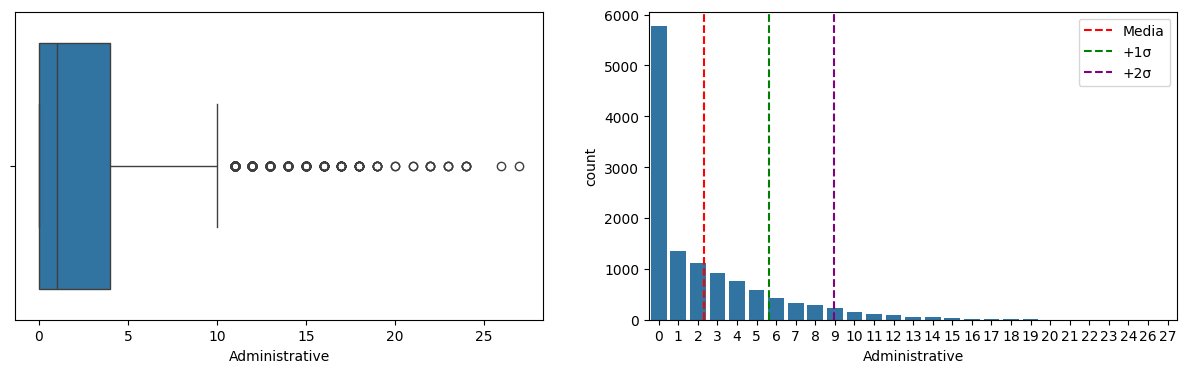

In [13]:
col = "Administrative"
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(data[col], ax=axs[0], orient="h")
sns.barplot(x=data[col].value_counts().index, y=data[col].value_counts(), ax=axs[1])
mean = np.mean(data[col])
std = np.std(data[col])
axs[1].axvline(mean, color='r', linestyle='--', label=f'Media')
axs[1].axvline(mean + std, color='g', linestyle='--', label=f'+1σ')
axs[1].axvline(mean + 2 * std, color='purple', linestyle='--', label=f'+2σ')
axs[1].legend()
plt.show()

Variable "Administrative":

Del gráfico de barras podemos ver que la gran mayoría de valores son ceros y a medida que aumenta el valor, la frecuencia disminuye.

El boxplot básicamente nos cuenta lo mismo que el gráfico de barras en cuanto al peso de valores bajos como 0 y 1, ya que la línea de Q2 está muy cercana al 0, además nos muestra algunos valores candidatos a ser outliers por encima del valor 10.

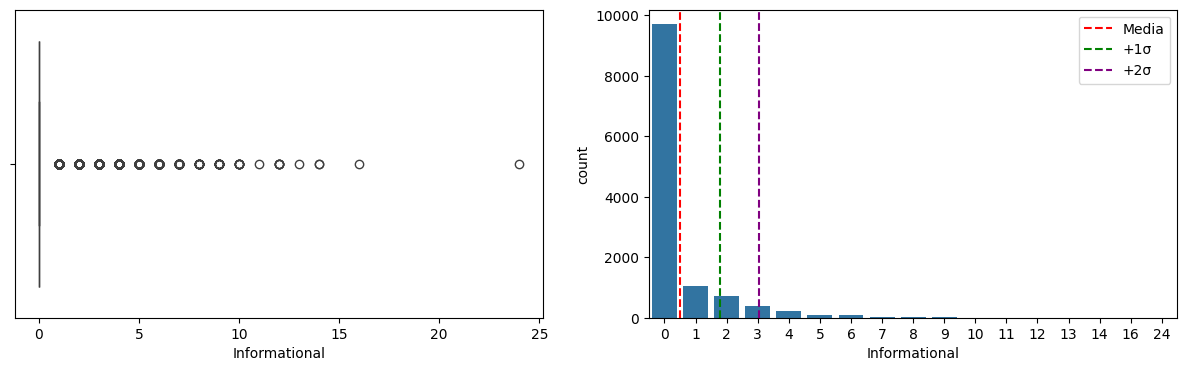

In [14]:
col = "Informational"
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(data[col], ax=axs[0], orient="h")
sns.barplot(x=data[col].value_counts().index, y=data[col].value_counts(), ax=axs[1])
mean = np.mean(data[col])
std = np.std(data[col])
axs[1].axvline(mean, color='r', linestyle='--', label=f'Media')
axs[1].axvline(mean + std, color='g', linestyle='--', label=f'+1σ')
axs[1].axvline(mean + 2 * std, color='purple', linestyle='--', label=f'+2σ')
axs[1].legend()
plt.show()

Variable "Informational":

Esta variable presenta un comportamiento similar a la anterior aunque todavía más desequilibrado, ya que hay una mayor densidad de valores 0, lo que en el boxplot se traduce como una línea sobre el 0 y sin bigotes en lugar de una caja con bigotes, es decir, todos los valores diferentes de 0 son tomados como outliers según la distribución.

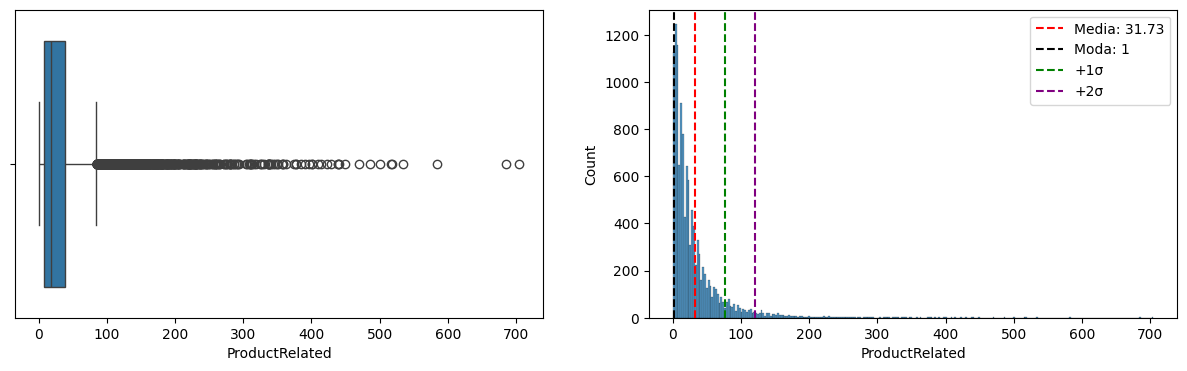

In [15]:
col = "ProductRelated"
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(data[col], ax=axs[0], orient="h")
sns.histplot(data[col], ax=axs[1])
mean = np.mean(data[col])
moda = mode(data[col], keepdims=True).mode[0]
std = np.std(data[col])
axs[1].axvline(mean, color='r', linestyle='--', label=f'Media: {mean:.2f}')
axs[1].axvline(moda, color='black', linestyle='--', label=f'Moda: {moda}')
axs[1].axvline(mean + std, color='g', linestyle='--', label=f'+1σ')
axs[1].axvline(mean + 2 * std, color='purple', linestyle='--', label=f'+2σ')
axs[1].legend()
plt.show()

Variable "ProductRelated":

Las gráficas para esta variable nos cuentan un poco sobre su naturaleza. A simple vista podemos observar que la mayoría de usuarios navega por un número bajo de páginas relacionadas con productos (entre 1 y aproximadamente 35). Es menos frecuente una sesión con numeros altos en esta métrica aunque no deja de ser un comportamiento normal o esperado, teniendo datos en el rango del bigote cercanos a ~90 páginas y muchos datos por encima, con una alta densidad hasta los ~300. Finalmente hay algunos pocos valores entre 450 y 700.

En conclusión el comportamiento de esta variable es bastante heterogéneo con densidad alta para números bajos.

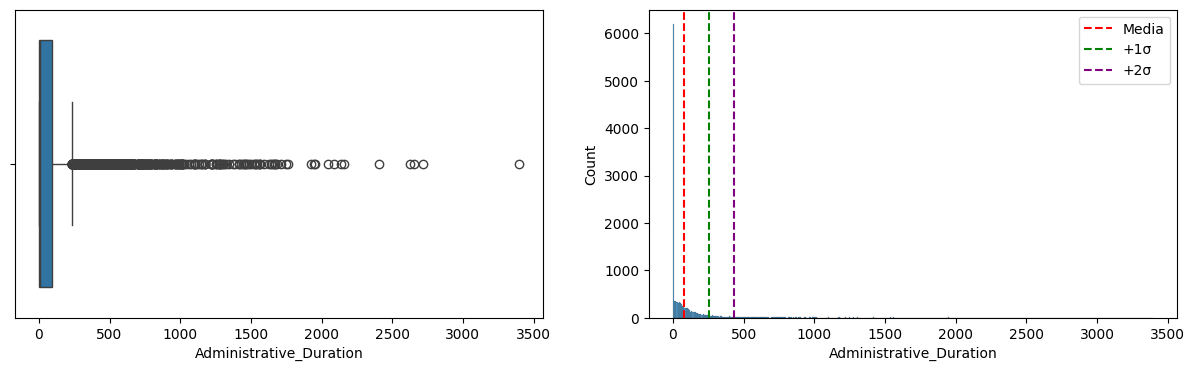

In [16]:
col = "Administrative_Duration"
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(data[col], ax=axs[0], orient="h")
sns.histplot(data[col], ax=axs[1])
mean = np.mean(data[col])
std = np.std(data[col])
axs[1].axvline(mean, color='r', linestyle='--', label=f'Media')
axs[1].axvline(mean + std, color='g', linestyle='--', label=f'+1σ')
axs[1].axvline(mean + 2 * std, color='purple', linestyle='--', label=f'+2σ')
axs[1].legend()
plt.show()

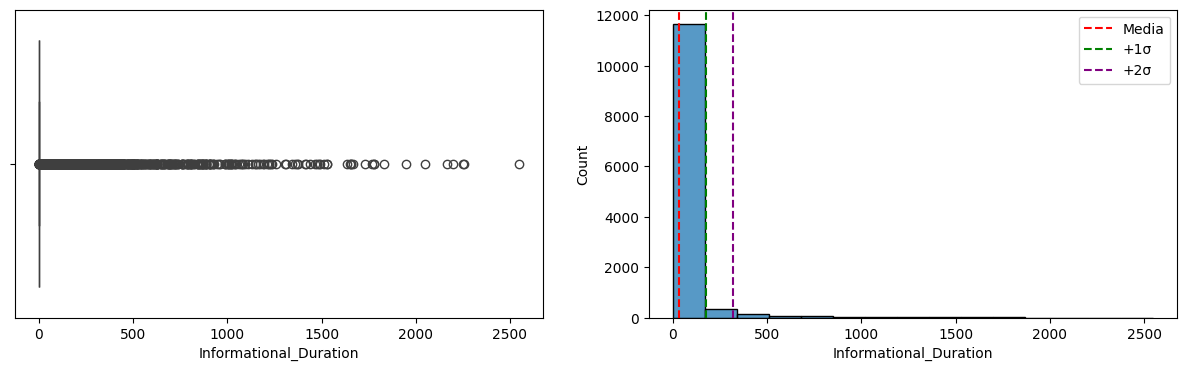

In [17]:
col = "Informational_Duration"
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(data[col], ax=axs[0], orient="h")
sns.histplot(data[col], ax=axs[1])
mean = np.mean(data[col])
std = np.std(data[col])
axs[1].axvline(mean, color='r', linestyle='--', label=f'Media')
axs[1].axvline(mean + std, color='g', linestyle='--', label=f'+1σ')
axs[1].axvline(mean + 2 * std, color='purple', linestyle='--', label=f'+2σ')
axs[1].legend()
plt.show()

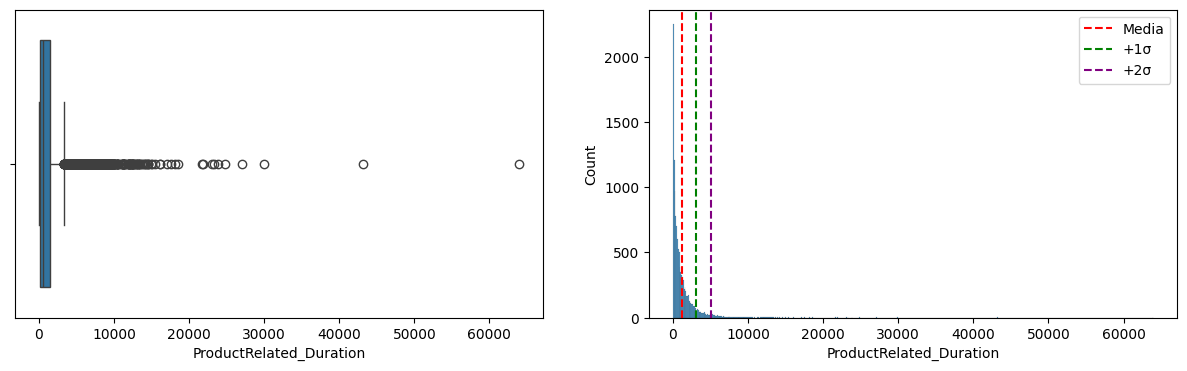

In [18]:
col = "ProductRelated_Duration"
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(data[col], ax=axs[0], orient="h")
sns.histplot(data[col], ax=axs[1])
mean = np.mean(data[col])
std = np.std(data[col])
axs[1].axvline(mean, color='r', linestyle='--', label=f'Media')
axs[1].axvline(mean + std, color='g', linestyle='--', label=f'+1σ')
axs[1].axvline(mean + 2 * std, color='purple', linestyle='--', label=f'+2σ')
axs[1].legend()
plt.show()

Variables "Administrative_Duration", "Informational_Duration", "ProductRelated_Duration":

Estas columnas representan el tiempo total del usuario en cada tipo de página, por lo que su comportamiento es bastante similar al total de páginas visitadas por categoría. Las gráficas muestran una alta densidad en valores bajos, de modo que el límite del rango no atípico del boxplot es bastante bajo y se observan muchos valores por fuera de este.

Frecuencias absolutas:
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

Frecuencias relativas (%):
VisitorType
Returning_Visitor    85.571776
New_Visitor          13.738848
Other                 0.689376
Name: proportion, dtype: float64


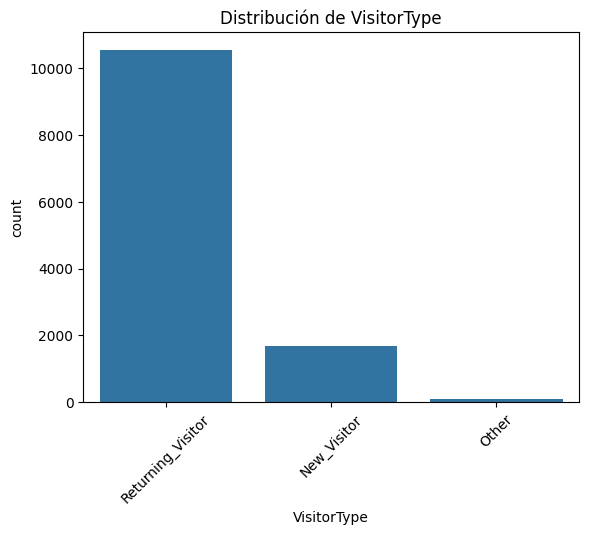

In [19]:
print("Frecuencias absolutas:")
print(data['VisitorType'].value_counts())

print("\nFrecuencias relativas (%):")
print(data['VisitorType'].value_counts(normalize=True) * 100)
sns.countplot(data=data, x='VisitorType')
plt.title("Distribución de VisitorType")
plt.xticks(rotation=45)
plt.show()


Frecuencias absolutas:
Weekend
False    9462
True     2868
Name: count, dtype: int64

Frecuencias relativas (%):
Weekend
False    76.739659
True     23.260341
Name: proportion, dtype: float64


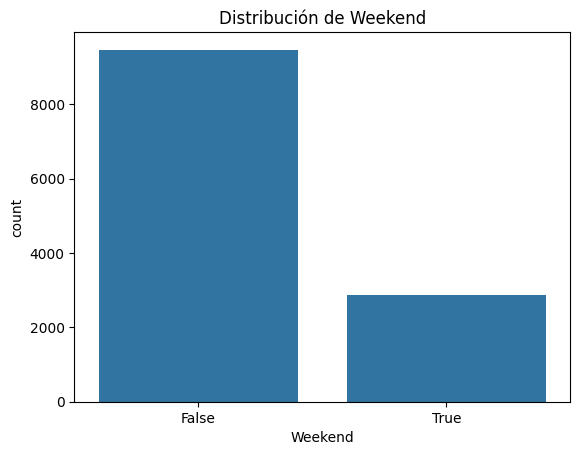

In [20]:
print("Frecuencias absolutas:")
print(data['Weekend'].value_counts())

print("\nFrecuencias relativas (%):")
print(data['Weekend'].value_counts(normalize=True) * 100)

sns.countplot(data=data, x='Weekend')
plt.title("Distribución de Weekend")
plt.show()


In [21]:
pct_fin_semana_anual = 28.5
pct_fin_semana_sesiones = data['Weekend'].mean() * 100

print(f"Porcentaje de días del año que son fin de semana: {pct_fin_semana_anual:.1f}%")
print(f"Porcentaje de sesiones que ocurren en fin de semana: {pct_fin_semana_sesiones:.2f}%")

diferencia = pct_fin_semana_sesiones - pct_fin_semana_anual
print(f"Diferencia: {diferencia:.2f}%")



Porcentaje de días del año que son fin de semana: 28.5%
Porcentaje de sesiones que ocurren en fin de semana: 23.26%
Diferencia: -5.24%


De la casilla anterior, al observar la pequeña diferencia entre el porcentaje de sesiones que ocurren en fin de semana, con el porcentaje respectivo de fines de semana al año, se puede ver que aunque no hay una tendencia marcada hacia alguna categoría.

## Análisis bivariado

In [22]:
data_numerica = data[numericas]

for i in range(len(data_numerica.columns)-1):
  for j in range(i+1, len(data_numerica.columns)):
    rho, _ = spearmanr(data_numerica[data_numerica.columns[i]], data_numerica[data_numerica.columns[j]])
    r, _ = pearsonr(data_numerica[data_numerica.columns[i]], data_numerica[data_numerica.columns[j]])
    print(f"{data_numerica.columns[i]} - {data_numerica.columns[j]}")
    print(f"Spearman: {rho:.2f}")
    print(f"Pearson: {r:.2f}")
  print("")

Administrative - Informational
Spearman: 0.37
Pearson: 0.38
Administrative - ProductRelated
Spearman: 0.46
Pearson: 0.43
Administrative - Administrative_Duration
Spearman: 0.94
Pearson: 0.60
Administrative - Informational_Duration
Spearman: 0.36
Pearson: 0.26
Administrative - ProductRelated_Duration
Spearman: 0.42
Pearson: 0.37

Informational - ProductRelated
Spearman: 0.37
Pearson: 0.37
Informational - Administrative_Duration
Spearman: 0.36
Pearson: 0.30
Informational - Informational_Duration
Spearman: 0.95
Pearson: 0.62
Informational - ProductRelated_Duration
Spearman: 0.37
Pearson: 0.39

ProductRelated - Administrative_Duration
Spearman: 0.43
Pearson: 0.29
ProductRelated - Informational_Duration
Spearman: 0.36
Pearson: 0.28
ProductRelated - ProductRelated_Duration
Spearman: 0.88
Pearson: 0.86

Administrative_Duration - Informational_Duration
Spearman: 0.35
Pearson: 0.24
Administrative_Duration - ProductRelated_Duration
Spearman: 0.41
Pearson: 0.36

Informational_Duration - ProductRe

En la casilla anterior se puede observar que hay valores significativos de Pearson y Spearman únicamente entre las variables que cuentan las visitas a un tipo de página y las que totalizan el tiempo de estadía en cada tipo. En el caso particular de "ProductRelated" y "ProductRelated_Duration" se observa una relación lineal mas fuerte.

Estos resultados corresponden con lo esperado dado el contexto de los datos. Ver muchas o pocas páginas administrativas no debería afectar la cantidad de páginas de otro tipo que se visitan o el tiempo en total de estadía.

Además, en todos aquellos casos que hay relación, siempre es mas alto el coeficiente de Spearman dado que aunque existe la relación y por definición es monótona, no es necesariamente lineal.

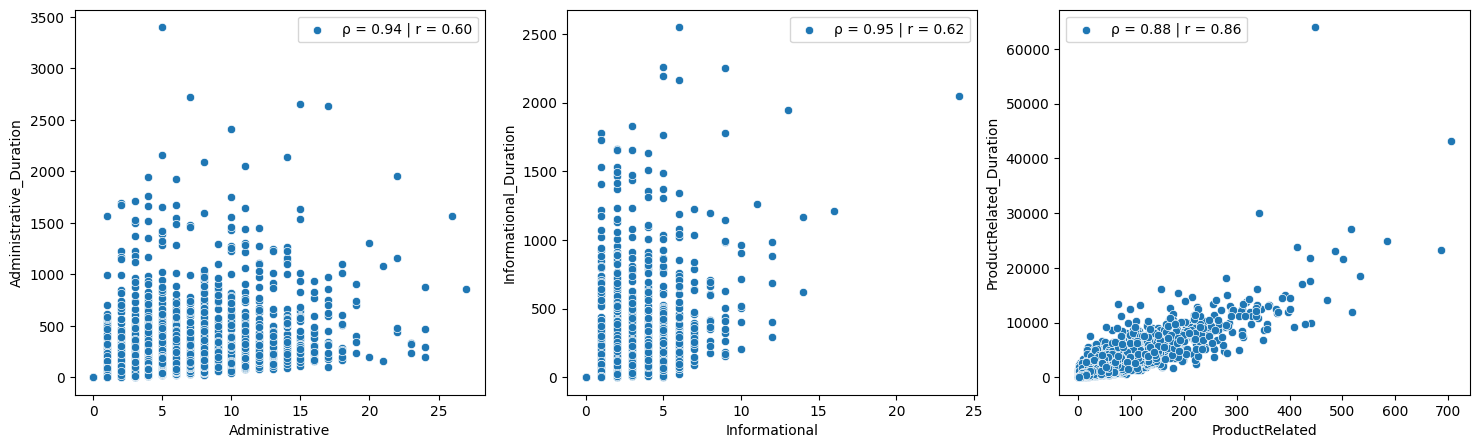

In [24]:
variables = [
    ("Administrative","Administrative_Duration"),
    ("Informational","Informational_Duration"),
    ("ProductRelated","ProductRelated_Duration")
]
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i in range(3):
  rho, _ = spearmanr(data[variables[i][0]], data[variables[i][1]])
  r, _ = pearsonr(data[variables[i][0]], data[variables[i][1]])
  sns.scatterplot(x=data[variables[i][0]], y=data[variables[i][1]], ax=axs[i], label=f"ρ = {rho:.2f} | r = {r:.2f}")
plt.show()

En las casilla anterior se puede observar baja linealidad en las gráficas de "Administrative" e "Informational", lo cual está respaldado por el coeficiente de Pearson; aunque es claro que hay una relación directa ya que se puede esperar que a mayor número de páginas visitadas de un tipo, mayor sea el tiempo total en esas páginas; por lo tanto, podemos ver un coeficiente de Spearman bastante alto en las tres gráficas.

Con respecto a la tercera gráfica, que corresponde a "ProductRelated", esta permite ver tanto en la distribución como en el coeficiente de Pearson, una clara relación lineal.

El comportamiento diferencial de ProductRelated probablemente está relacionado con la naturaleza de la página, al ser un e-commerce es esperable una mayor interacción con páginas relacionadas a producto; además, en la búsqueda de un producto, al estar revisando distintas opciones, la rutina puede ser mas o menos la misma y tal vez esto explica la fuerte relacion lineal.

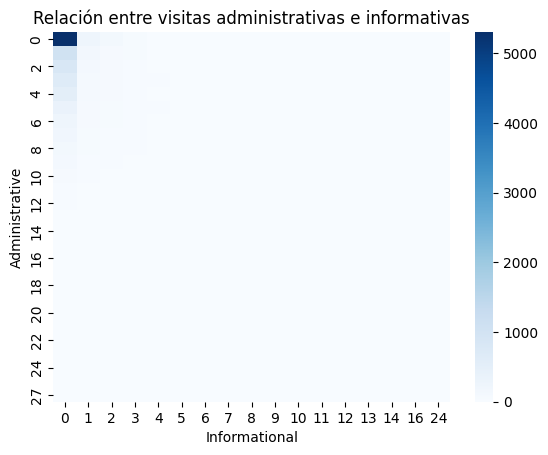

In [25]:
ct = pd.crosstab(data["Administrative"], data["Informational"])
sns.heatmap(ct, annot=False, cmap="Blues", norm=None)
plt.xlabel("Informational")
plt.ylabel("Administrative")
plt.title("Relación entre visitas administrativas e informativas")
plt.show()

De lo anterior podemos concluir que no hay una relacion entre la cantidad de páginas informativas y la cantidad de págionas administrativas que se visitan en una sesión. Únicamente se puede ver que hay una gran cantidad de sesiones que no visitan ninguno de los 2 tipos de páginas, sin embargo, que se visiten muchas páginas de un tipo no significa que se visiten muchas del otro.

<Figure size 1000x800 with 0 Axes>

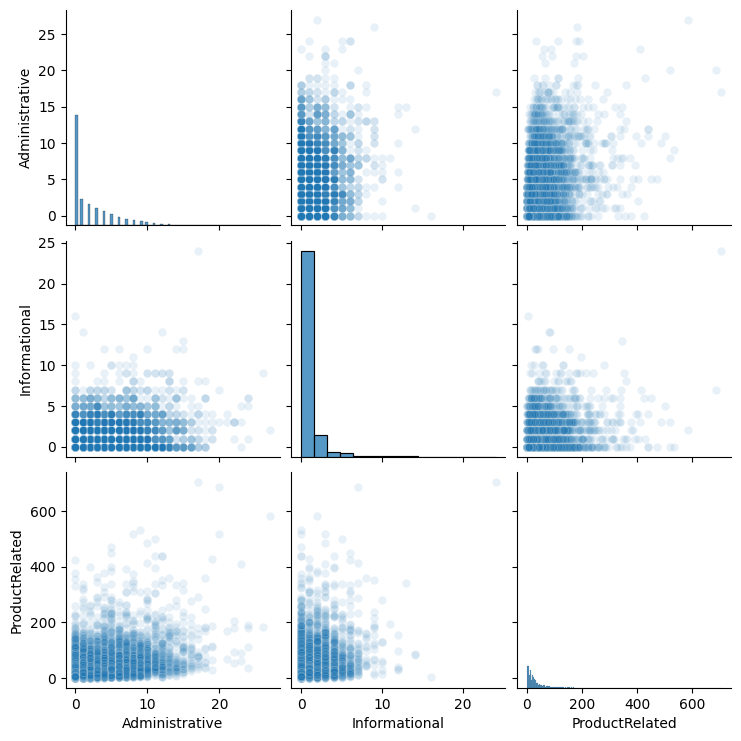

In [26]:
plt.figure(figsize=(10, 8))
sns.pairplot(data[["Administrative","Informational","ProductRelated"]],plot_kws={"alpha":0.1})
plt.show()

Estas gráficas dicen que el comportamiento normal del usuario es visitar pocas páginas, especialmente de los tipos informacional o administrativas.

<Figure size 1000x800 with 0 Axes>

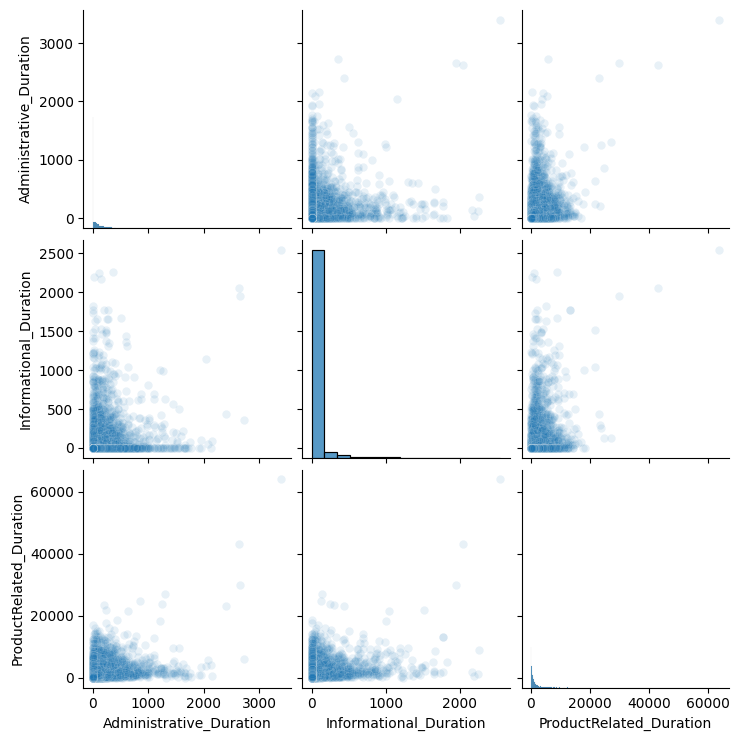

In [27]:
plt.figure(figsize=(10, 8))
sns.pairplot(data[["Administrative_Duration","Informational_Duration","ProductRelated_Duration"]],plot_kws={"alpha":0.1})
plt.show()

En estas gráficas, analizando las relaciones entre los tiempos de duración en cada tipo de páginas, se puede ver que:


*   Analizando "ProductRelated_Duration" con "Administrative_Duration" e "Informational_Duration", presenta valores altos cuando la otra variable tambien presenta valores altos, es decir que hay una relación lineal para valores altos.

*   En valores bajos no se observa una tendencia similar ya que las 3 variables tienen una alta densidad en esa zona.



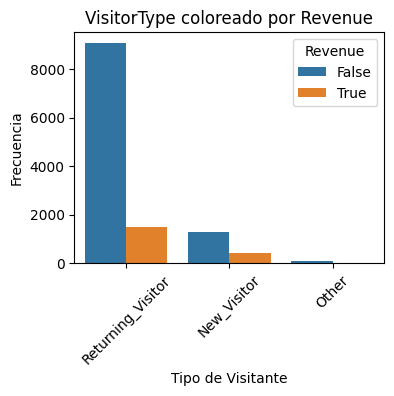

In [28]:
plt.figure(figsize=(4,3))
sns.countplot(data, x='VisitorType', hue='Revenue')
plt.title('VisitorType coloreado por Revenue')
plt.xlabel('Tipo de Visitante')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()



In [29]:
porcentajes = data.groupby('VisitorType')['Revenue'].mean() * 100
porcentajes_no = (1 - data.groupby('VisitorType')['Revenue'].mean()) * 100

print("Porcentaje de visitantes que compran por tipo:")
print(porcentajes)

print("\nPorcentaje de visitantes que no compran por tipo:")
print(porcentajes_no)

pct_compras_nuevos = data[data['VisitorType'] == 'New_Visitor']['Revenue'].mean() * 100
pct_nuevos = (data[data["VisitorType"] == "New_Visitor"]["VisitorType"].count()
              /len(data))*100
print(f"\nPorcentaje de compras hechas por usuarios nuevos: {pct_compras_nuevos:.2f}%")
print(f"Porcentaje de usuarios nuevos: {pct_nuevos:.2f}%")



Porcentaje de visitantes que compran por tipo:
VisitorType
New_Visitor          24.911452
Other                18.823529
Returning_Visitor    13.932329
Name: Revenue, dtype: float64

Porcentaje de visitantes que no compran por tipo:
VisitorType
New_Visitor          75.088548
Other                81.176471
Returning_Visitor    86.067671
Name: Revenue, dtype: float64

Porcentaje de compras hechas por usuarios nuevos: 24.91%
Porcentaje de usuarios nuevos: 13.74%


Analizando "VisitorType" y su comportamiento según la venta de la sesión ("Revenue") muestra que los usuarios nuevos compran mas, quizá luego de conocer la página regresen solo a navegar sin intención de compra o tal vez su primera interacción se deba a la necesidad de compra. Mas allá de eso, tambien se puede observar una proporción similar entre las sesiones con compra y las que no, por cada tipo de usuario.

Porcentaje de compras vs no compras por Weekend:
Revenue      False      True 
Weekend                      
False    85.108856  14.891144
True     82.601116  17.398884


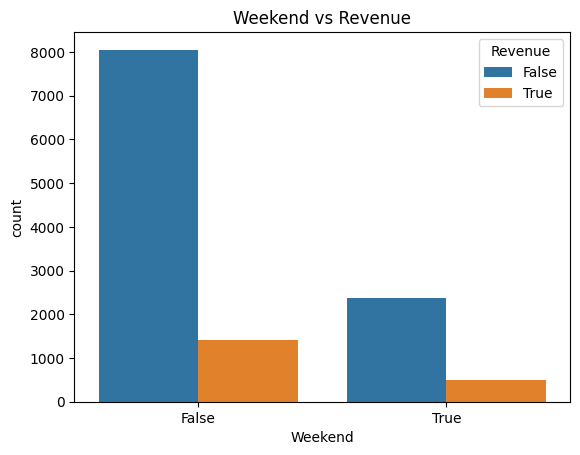

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tabla = pd.crosstab(data['Weekend'], data['Revenue'], normalize='index') * 100
print("Porcentaje de compras vs no compras por Weekend:")
print(tabla)

sns.countplot(data=data, x='Weekend', hue='Revenue')
plt.title("Weekend vs Revenue")
plt.show()


Acá se puede observar que aunque no hay una tendencia marcada, las sesiones son un poco mas propensas a terminar en compra durante los fines de semana.

## Análisis multivariado

### Correlaciones

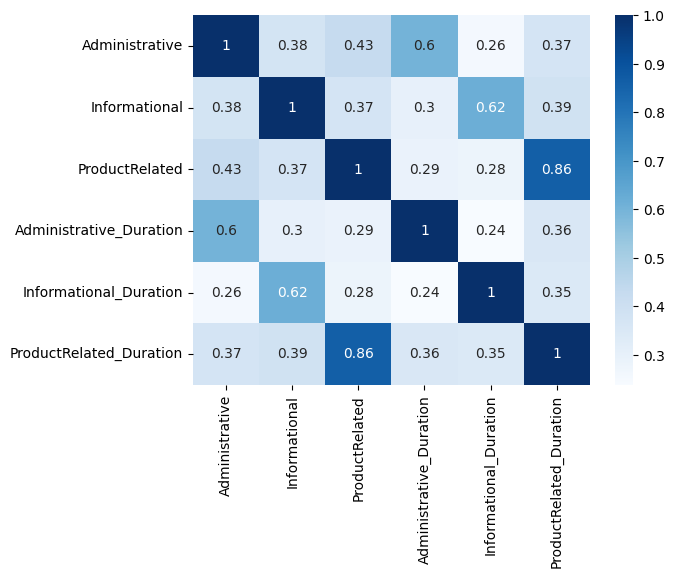

In [31]:
data_corr = data[numericas].corr()
sns.heatmap(data_corr, annot=True, cmap="Blues", norm=None)
plt.show()

Esta gráfica de correlaciones respalda las conclusiones realizadas hasta el momento y a lo largo del análisis.

### PCA

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerica)
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

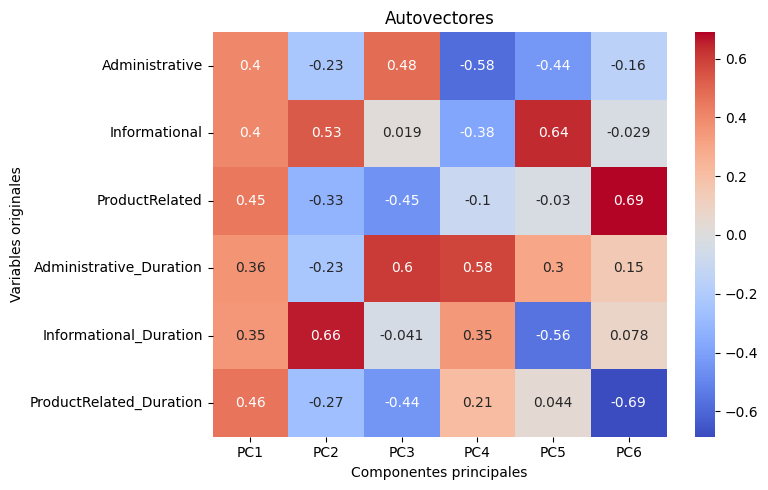

Ecuaciones de los componentes principales:

PC1 = 0.404·'Administrative' + 0.404·'Informational' + 0.452·'ProductRelated' + 0.363·'Administrative_Duration' + 0.354·'Informational_Duration' + 0.462·'ProductRelated_Duration'
PC2 = -0.229·'Administrative' + 0.532·'Informational' + -0.325·'ProductRelated' + -0.229·'Administrative_Duration' + 0.658·'Informational_Duration' + -0.271·'ProductRelated_Duration'
PC3 = 0.485·'Administrative' + 0.019·'Informational' + -0.452·'ProductRelated' + 0.604·'Administrative_Duration' + -0.041·'Informational_Duration' + -0.441·'ProductRelated_Duration'
PC4 = -0.579·'Administrative' + -0.384·'Informational' + -0.1·'ProductRelated' + 0.582·'Administrative_Duration' + 0.35·'Informational_Duration' + 0.214·'ProductRelated_Duration'
PC5 = -0.435·'Administrative' + 0.637·'Informational' + -0.03·'ProductRelated' + 0.301·'Administrative_Duration' + -0.558·'Informational_Duration' + 0.044·'ProductRelated_Duration'
PC6 = -0.158·'Administrative' + -0.029·'Informationa

In [34]:
# Matriz de componentes
componentes = pd.DataFrame(pca.components_.T,
                           columns=[f'PC{i+1}' for i in range(6)],
                           index=data_numerica.columns)

# 📐 Visualización de autovectores
plt.figure(figsize=(8, 5))
sns.heatmap(componentes, annot=True, cmap='coolwarm', center=0)
plt.title('Autovectores')
plt.ylabel('Variables originales')
plt.xlabel('Componentes principales')
plt.tight_layout()
plt.show()

# Ecuaciones de los componentes principales con nombres reales
print("Ecuaciones de los componentes principales:\n")
for i, comp in enumerate(componentes.columns):
    pesos = pca.components_[i]
    ecuacion = " + ".join([f"{round(pesos[j], 3)}·'{data_numerica.columns[j]}'" for j in range(len(pesos))])
    print(f"{comp} = {ecuacion}")

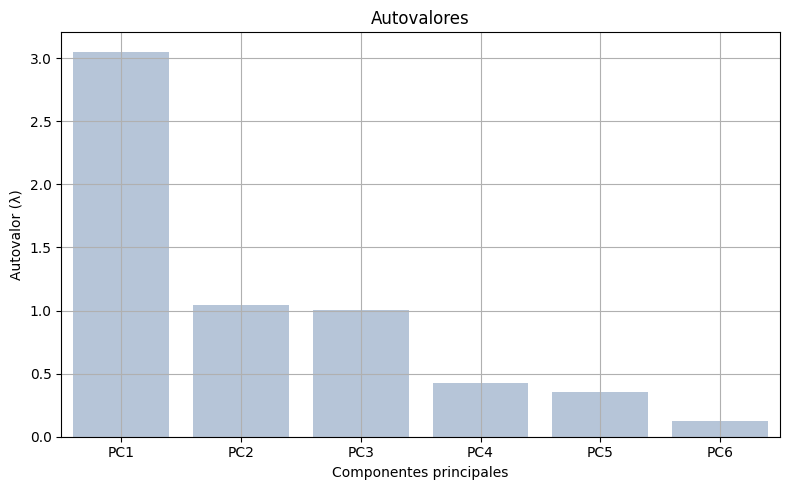

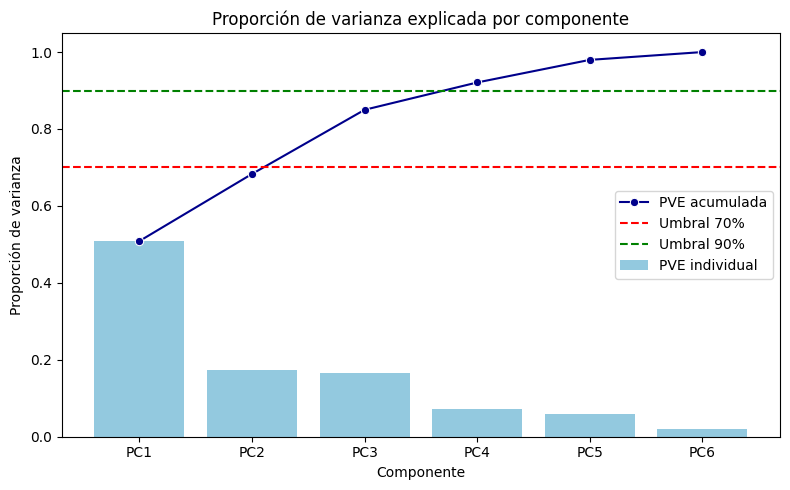

In [35]:
# Varianza explicada
varianza = pca.explained_variance_
PVE = pca.explained_variance_ratio_
PVE_acum = np.cumsum(PVE)
componentes = [f'PC{i+1}' for i in range(len(PVE))]

# DataFrame para visualización
df_varianza = pd.DataFrame({
    'Componente': componentes,
    'Autovalor': varianza,
    'PVE': PVE,
    'PVE acumulada': PVE_acum
})

# Autovalores
plt.figure(figsize=(8, 5))
sns.barplot(x='Componente', y='Autovalor', data=df_varianza, color='lightsteelblue')
plt.title('Autovalores')
plt.ylabel('Autovalor (λ)')
plt.xlabel('Componentes principales')
plt.grid(True)
plt.tight_layout()
plt.show()


# Proporción de varianza explicada
plt.figure(figsize=(8, 5))
sns.barplot(x='Componente', y='PVE', data=df_varianza, color='skyblue', label='PVE individual')
sns.lineplot(x='Componente', y='PVE acumulada', data=df_varianza, marker='o', color='darkblue', label='PVE acumulada')
plt.axhline(0.7, color='red', linestyle='--', label='Umbral 70%')
plt.axhline(0.9, color='green', linestyle='--', label='Umbral 90%')
plt.title('Proporción de varianza explicada por componente')
plt.ylabel('Proporción de varianza')
plt.legend()
plt.tight_layout()
plt.show()

Según el análisis de componentes principales PCA, para este conjunto de datos se puede reducir el número de variables de 7 a 4 explicando casi el 90% de variabilidad.

In [36]:
data.to_csv("../../datos/pre_processed.csv")